In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import metpy.calc as mpcalc
from metpy.units import units
import pytz
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec
mpl.rcParams['timezone'] = 'US/Pacific'
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']

In [4]:
# data read in 
jg = xr.open_dataset('jarbo_gap_RAWS.nc')
os = xr.open_dataset('openshaw_RAWS.nc')
#cr = xr.open_dataset('carpenter_ridge_RAWS.nc')
sc = xr.open_dataset('sterling_city_RAWS.nc')
rh = xr.open_dataset('PG129_Red_Hill_Lookout_RAWS.nc')
hb = xr.open_dataset('Humbug_RAWS.nc')
sb = xr.open_dataset('Saddleback_RAWS.nc')
cb = xr.open_dataset('Colby_mtn_RAWS.nc')

C:\Users\Matthew\Miniconda3\envs\working\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


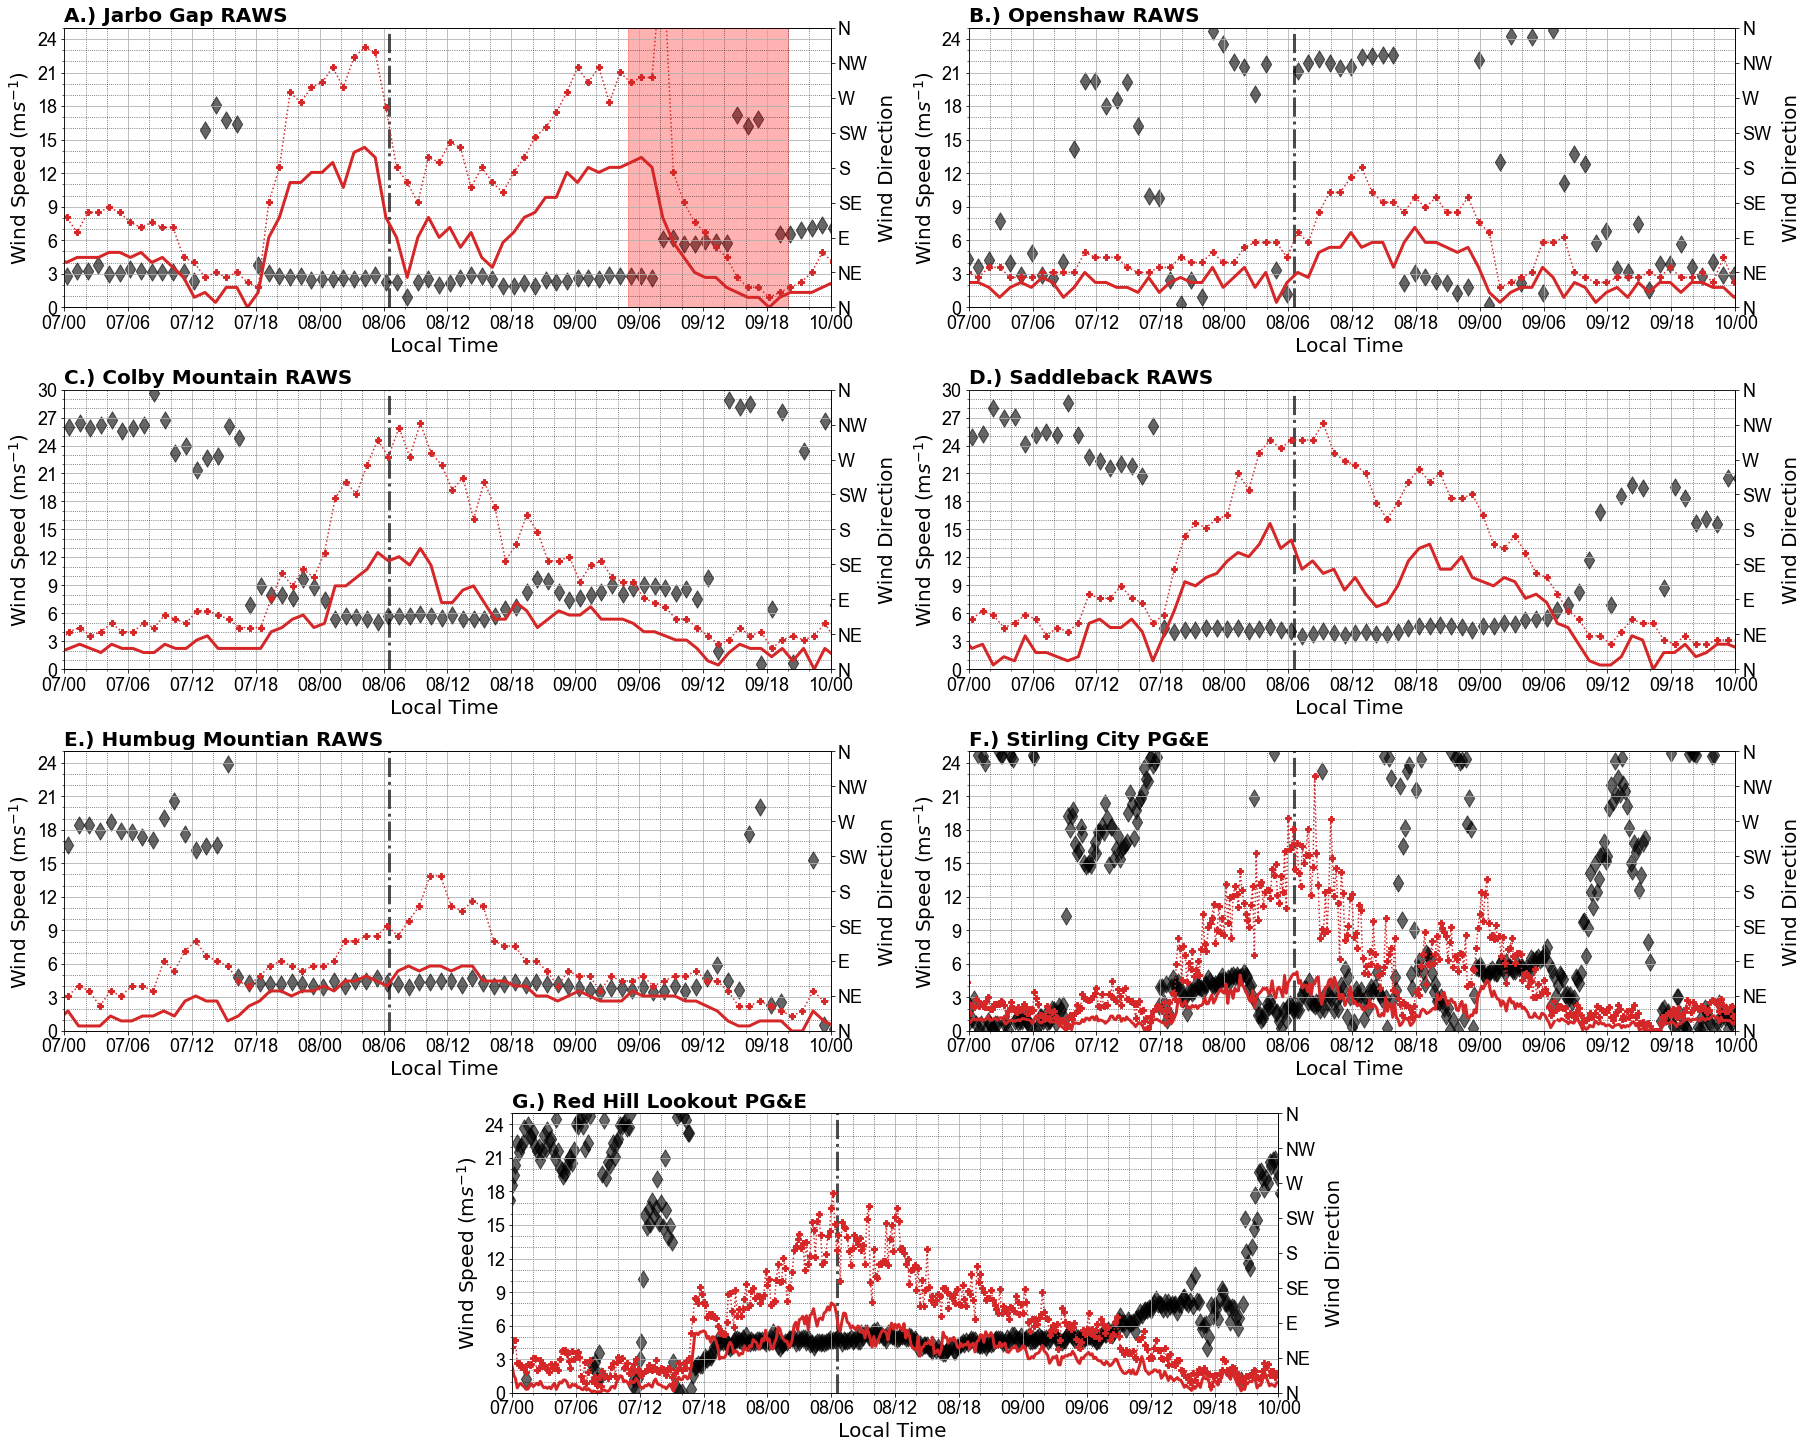

In [12]:
fig= plt.figure(figsize = (25,20),constrained_layout=True)
gs = fig.add_gridspec(4, 4)
ax = plt.subplot(gs[0, :2])
ax1 = plt.subplot(gs[0, 2:])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1, 2:])
ax4 = plt.subplot(gs[2, :2])
ax5 = plt.subplot(gs[2, 2:])
ax6 = plt.subplot(gs[3, 1:3])

ax.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax1.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax2.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax3.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax4.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax5.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax6.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)


###########################################################################################################################################################################
ax.axvspan(np.datetime64('2018-11-09 05:00:00')+ np.timedelta64(8, 'h'), np.datetime64('2018-11-09 12:00:00-08:00')+ np.timedelta64(8, 'h'), color = 'red', alpha = .3)
ax.plot(jg.time,jg.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax.plot(jg.time.data, jg.wgst,ls=':',  marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax.set_xlabel('Local Time ', fontsize = 20)
ax.set_ylim(0,25)

ax_= ax.twinx()
ax_.scatter(pd.to_datetime(jg.time.data),jg.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second axis to be from 0-360 then replacing the labels with directions
ax_.set_ylim(0,360)
ax_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

#handling the legends
#fig.legend( fontsize = 18, ncol = 3,bbox_to_anchor= (.97,1.03))
ax.set_title('A.) Jarbo Gap RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax_.get_xticklabels() + ax_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax.grid()
ax.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax.set_zorder(10)
ax.patch.set_visible(False)
ax_.patch.set_visible(True)

####################################################################################################################################################
ax1.plot(os.time,os.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax1.plot(os.time.data, os.wgst, ls=':', marker = 'P',label = 'Wind Gusts', color = 'tab:red')
ax1.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax1.set_xlabel('Local Time ', fontsize = 20)
ax1.set_ylim(0,25)

ax1_= ax1.twinx()
ax1_.scatter(pd.to_datetime(os.time.data),os.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax1is to be from 0-360 then replacing the labels with directions
ax1_.set_ylim(0,360)
ax1_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax1_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax1.set_title('B.) Openshaw RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax1_.get_xticklabels() + ax1_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax1.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax1.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax1.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax1.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax1_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax1.grid()
ax1.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax1.set_zorder(10)
ax1.patch.set_visible(False)
ax1_.patch.set_visible(True)
####################################################################################################################################################
ax2.plot(cb.time,cb.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax2.plot(cb.time.data, cb.wgst, ls = ':', marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax2.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax2.set_xlabel('Local Time ', fontsize = 20)
ax2.set_ylim(0,30)

ax2_= ax2.twinx()
ax2_.scatter(pd.to_datetime(cb.time.data),cb.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax2is to be from 0-360 then replacing the labels with directions
ax2_.set_ylim(0,360)
ax2_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax2_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax2.set_title('C.) Colby Mountain RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax2_.get_xticklabels() + ax2_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax2.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax2.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax2.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax2.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax2_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax2.grid()
ax2.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax2.set_zorder(10)
ax2.patch.set_visible(False)
ax2_.patch.set_visible(True)

####################################################################################################################################################
ax3.plot(sb.time,sb.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax3.plot(sb.time.data, sb.wgst, ls=':', marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax3.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax3.set_xlabel('Local Time ', fontsize = 20)
ax3.set_ylim(0,30)

ax3_= ax3.twinx()
ax3_.scatter(pd.to_datetime(sb.time.data),sb.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax3is to be from 0-360 then replacing the labels with directions
ax3_.set_ylim(0,360)
ax3_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax3_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax3.set_title('D.) Saddleback RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax3_.get_xticklabels() + ax3_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax3.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax3.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax3.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax3.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax3_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax3.grid()
ax3.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')
ax3.set_zorder(10)
ax3.patch.set_visible(False)
ax3_.patch.set_visible(True)


ax4.plot(hb.time,hb.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax4.plot(hb.time.data, hb.wgst,ls=':',  marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax4.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax4.set_xlabel('Local Time ', fontsize = 20)
ax4.set_ylim(0,25)

ax4_= ax4.twinx()
ax4_.scatter(pd.to_datetime(hb.time.data),hb.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax4is to be from 0-360 then replacing the labels with directions
ax4_.set_ylim(0,360)
ax4_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax4_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax4.set_title('E.) Humbug Mountian RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax4_.get_xticklabels() + ax4_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax4.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax4.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax4.xaxis.set_minor_locator(dates.HourLocator(interval=2))
ax4.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax4_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax4.grid()
ax4.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax4.set_zorder(10)
ax4.patch.set_visible(False)
ax4_.patch.set_visible(True)


ax5.plot(sc.time,sc.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax5.plot(sc.time.data, sc.wgst, ls=':', marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax5.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax5.set_xlabel('Local Time ', fontsize = 20)
ax5.set_ylim(0,25)

ax5_= ax5.twinx()
ax5_.scatter(pd.to_datetime(sc.time.data),sc.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax3is to be from 0-360 then replacing the labels with directions
ax5_.set_ylim(0,360)
ax5_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax5_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax5.set_title('F.) Stirling City PG&E', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax5.get_xticklabels() + ax5.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax5_.get_xticklabels() + ax5_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax5.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax5.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax5.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax5.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax5_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax5.grid()
ax5.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')
ax5.set_zorder(10)
ax5.patch.set_visible(False)
ax5_.patch.set_visible(True)


ax6.plot(rh.time,rh.wspd, label = '10m Wind Speed', ls = '-', linewidth = 3, color = 'tab:red')
ax6.plot(rh.time.data, rh.wgst,ls=':',  marker = 'P', label = 'Wind Gusts', color = 'tab:red')
ax6.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax6.set_xlabel('Local Time ', fontsize = 20)
ax6.set_ylim(0,25)

ax6_= ax6.twinx()
ax6_.scatter(pd.to_datetime(rh.time.data),rh.wdir, s=150,marker = 'd', label ='Wind Direction', color = 'k', alpha = .6)
### formatting the second ax4is to be from 0-360 then replacing the labels with directions
ax6_.set_ylim(0,360)
ax6_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax6_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax6.set_title('G.) Red Hill Lookout PG&E', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax6.get_xticklabels() + ax6.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax6_.get_xticklabels() + ax6_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax6.set_xlim('2018-11-07 00:00:00-08:00', '2018-11-10 00:00:00-08:00')
ax6.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax6.xaxis.set_minor_locator(dates.HourLocator(interval=2))
ax6.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax6_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax6.grid()
ax6.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax6.set_zorder(10)
ax6.patch.set_visible(False)
ax6_.patch.set_visible(True)

plt.savefig('7station_plot.png', dpi = 300)